In [1]:
import pandas as pd

In [20]:
dataset = pd.read_csv(r"C:\Users\HP 1011 x2\Documents\sarah's work\Machine Learning Model\NPV model data.csv")

In [21]:
dataset.head()

,Year,DR,DF,UCF,PV,DV,NPV
0,1,10,0.91,10000,9091,909.0,9090.91
1,2,10,0.83,10000,8264,1736.0,17355.37
2,3,10,0.75,10000,7513,2487.0,24868.52
3,4,10,0.68,10000,6830,3170.0,31698.65
4,5,10,0.62,10000,6209,3791.0,37907.87


In [22]:
dataset.describe()

,Year,DR,DF,UCF,PV,DV,NPV
count,1660.000000,1660.000000,1660.000000,1.660000e+03,1.660000e+03,1.660000e+03,1.660000e+03
mean,10.500000,15.204819,0.409813,1.405015e+08,5.762468e+07,8.287685e+07,7.507759e+08
std,5.768019,9.834997,0.321662,2.946148e+08,1.598751e+08,2.028761e+08,1.953755e+09
min,1.000000,1.000000,0.010000,1.000000e+03,5.000000e+00,1.000000e+01,7.692300e+02
25%,5.750000,5.000000,0.110000,5.000000e+04,1.637575e+04,3.799977e+04,3.097222e+05
50%,10.500000,15.000000,0.350000,1.000000e+06,4.654940e+05,8.459952e+05,8.539791e+06
75%,15.250000,25.000000,0.710000,1.000000e+08,1.871317e+07,4.015824e+07,3.253559e+08
max,20.000000,30.000000,0.990000,1.000000e+09,9.900990e+08,9.947382e+08,1.804555e+10


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    1660 non-null   int64  
 1   DR      1660 non-null   int64  
 2   DF      1660 non-null   float64
 3   UCF     1660 non-null   int64  
 4   PV      1660 non-null   int64  
 5   DV      1660 non-null   float64
 6   NPV     1660 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 90.9 KB


In [24]:
dataset.columns

Index(['Year', 'DR', 'DF', 'UCF', 'PV', 'DV', 'NPV'], dtype='object')

<AxesSubplot:>

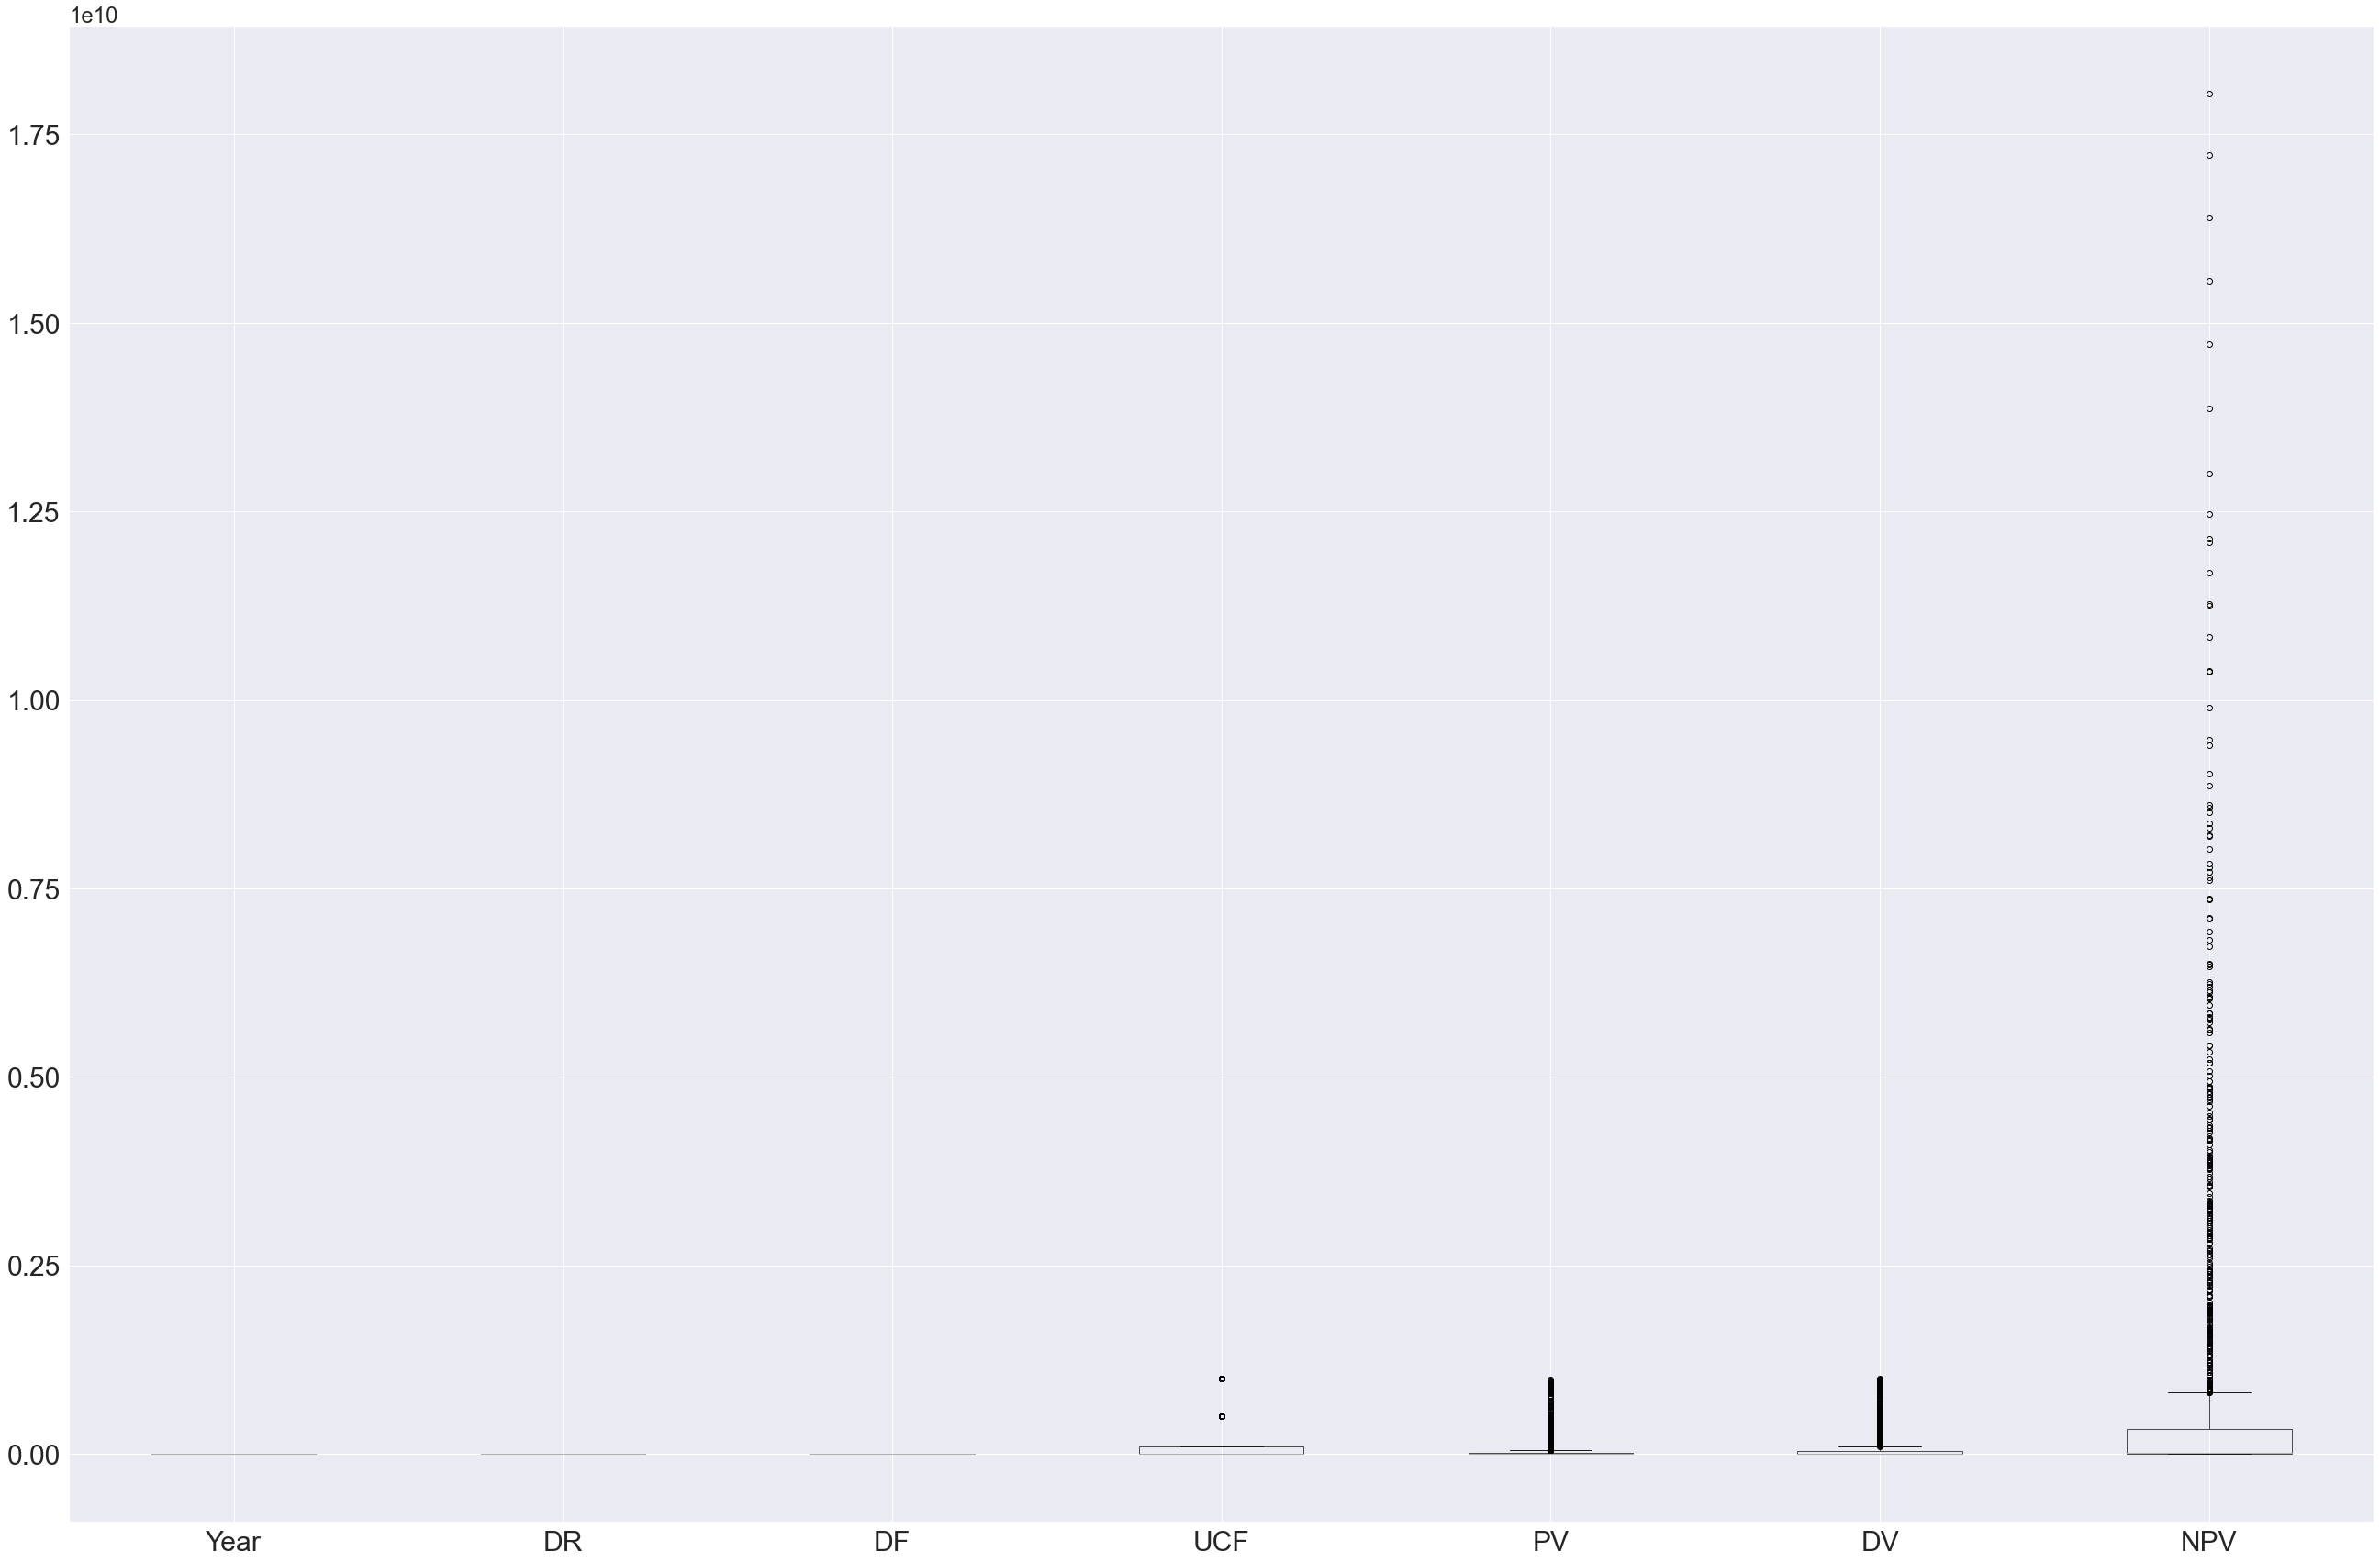

In [25]:
import matplotlib.pyplot as plt
import matplotlib

params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
dataset.iloc[:, :].boxplot(fontsize = 30, figsize=(45,30))

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'DR'}>,
        <AxesSubplot:title={'center':'DF'}>],
       [<AxesSubplot:title={'center':'UCF'}>,
        <AxesSubplot:title={'center':'PV'}>,
        <AxesSubplot:title={'center':'DV'}>],
       [<AxesSubplot:title={'center':'NPV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

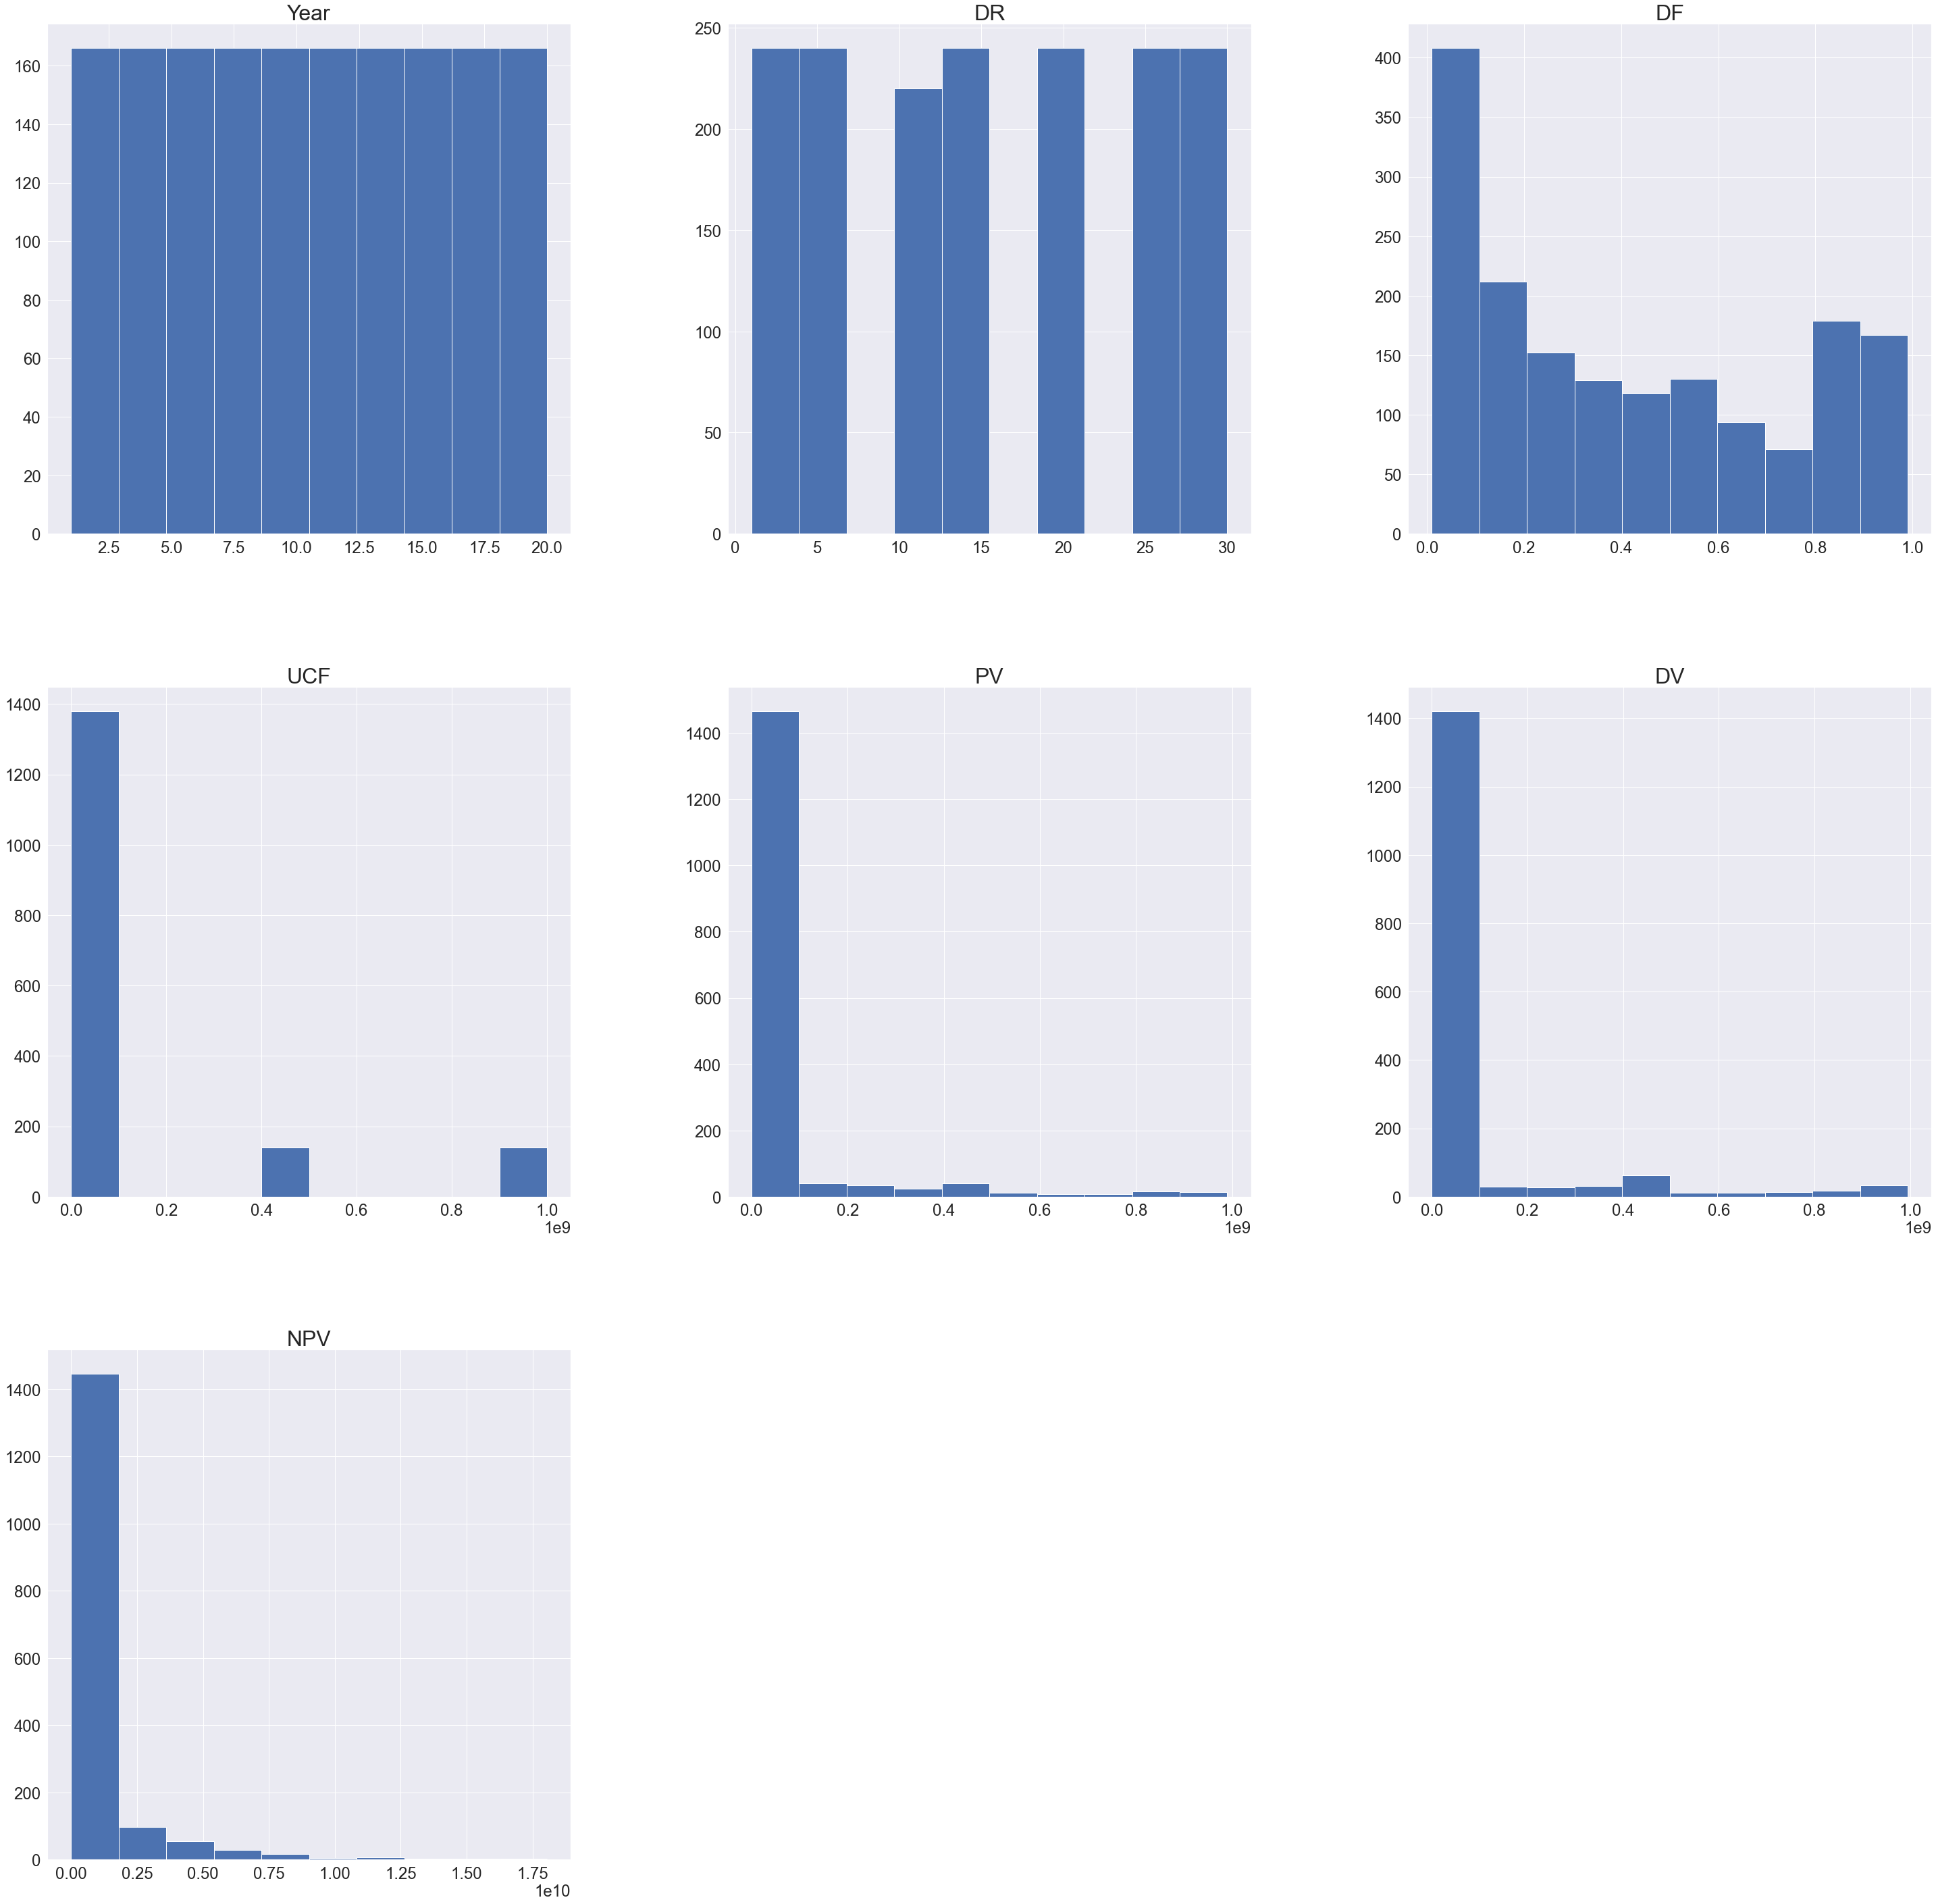

In [26]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
dataset.hist(figsize=(50,50))

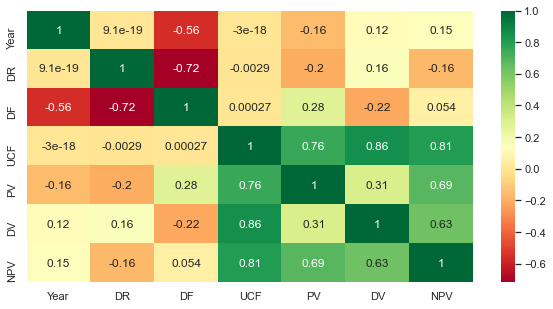

In [53]:
import seaborn as sns

sns.set(font_scale=1)
corrmat = dataset.corr()
top_corr_features = corrmat.index
fig, ax = plt.subplots(figsize=(10,5))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

In [56]:
correlations = dataset.corr()['NPV'].sort_values()

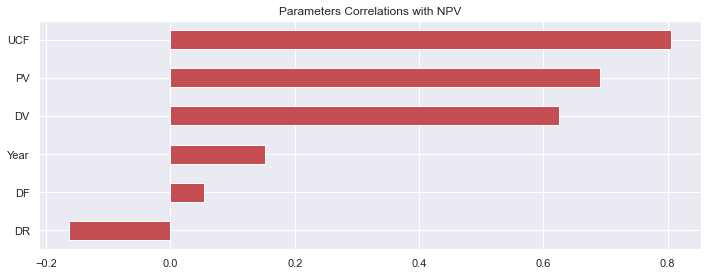

In [68]:
fig, ax = plt.subplots(1, figsize=(10,4))
correlations.iloc[-11:-1].plot.barh(title='Parameters Correlations with NPV', color='r')
plt.tight_layout(h_pad = 2.5)

In [34]:
X = dataset.drop('NPV', axis = 1)
y = dataset.NPV

In [35]:
X.shape, y.shape

((1660, 6), (1660,))

In [106]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [107]:
model = ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [108]:
pred = model.predict(X_test)

In [109]:
print("Testing Accuracy :", model.score(X_test, y_test))
print("Training Accuracy :", model.score(X_train,y_train))
print ("MSE :", metrics.mean_squared_error(y_test,pred))
mse = metrics.mean_squared_error(y_test,pred)
print ("RMSE :", np.sqrt(mse))
print ("MAE :", metrics.mean_absolute_error(y_test,pred))

Testing Accuracy : 0.9995698158717097
Training Accuracy : 1.0
MSE : 1455836494837522.0
RMSE : 38155425.49674321
MAE : 11013507.31833675


C:\Users\HP 1011 x2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


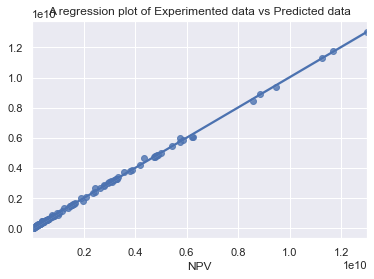

In [110]:
sns.regplot(y_test,pred)
plt.title('A regression plot of Experimented data vs Predicted data')
plt.show()

In [2]:
import pickle

In [153]:
import pickle
pickle.dump(model, open('ExtraNPVmodel.pkl', 'wb'))

In [3]:
loaded_model = pickle.load(open('ExtraNPVmodel.pkl', 'rb'))

In [4]:
#print(loaded_model.predict([[4, 10, 0.68, 10000, 6830, 3170]]))

[31698.65]


In [6]:
import pandas as pd
data_set2 = pd.read_csv('test data.csv')

In [7]:
data_set2.head()

,Year,DR,DF,UCF,PV,DV,NPV
0,1,2.0,0.98,2500,2450.98,49.02,2450.98
1,2,2.0,0.96,2500,2402.92,97.08,4853.90
2,3,2.0,0.94,2500,2355.81,144.19,7209.71
3,4,2.0,0.92,2500,2309.61,190.39,9519.32
4,5,2.0,0.91,2500,2264.33,235.67,11783.65


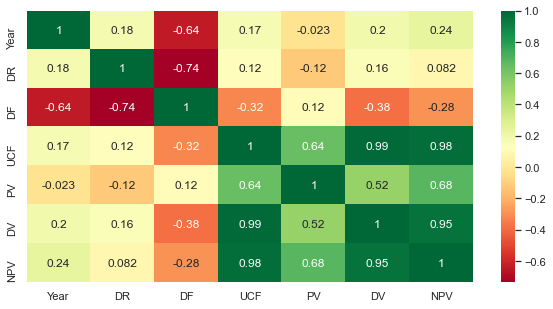

In [123]:
sns.set(font_scale=1)
corrmat2 = data_set2.corr()
top_corr_features = corrmat2.index
fig, ax = plt.subplots(figsize=(10,5))
#plot heat map
g=sns.heatmap(data_set2[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

In [124]:
data_set2.describe()

,Year,DR,DF,UCF,PV,DV,NPV
count,163.000000,163.000000,163.000000,1.630000e+02,1.630000e+02,1.630000e+02,1.630000e+02
mean,11.214724,9.769877,0.536012,6.084752e+07,1.567871e+07,4.516881e+07,3.676277e+08
std,5.577448,11.989693,0.303275,1.747311e+08,3.062981e+07,1.568519e+08,9.456839e+08
min,1.000000,1.500000,0.000000,5.000000e+02,2.600000e-01,2.830000e+01,4.717000e+02
25%,7.000000,2.770000,0.300000,2.500000e+03,2.155065e+03,4.993250e+02,1.724684e+04
50%,11.000000,6.000000,0.590000,7.500000e+05,5.137093e+05,2.183109e+05,6.003058e+06
75%,16.000000,13.000000,0.805000,1.567499e+07,7.806580e+06,6.156508e+06,1.067263e+08
max,20.000000,46.000000,0.990000,7.000000e+08,1.456262e+08,6.697043e+08,3.939437e+09


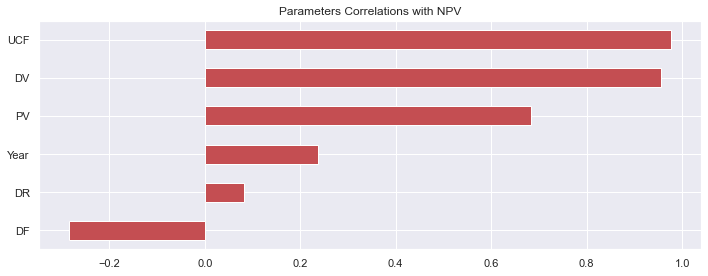

In [125]:
correlations2 = data_set2.corr()['NPV'].sort_values()
fig, ax = plt.subplots(1, figsize=(10,4))
correlations2.iloc[-11:-1].plot.barh(title='Parameters Correlations with NPV', color='r')
plt.tight_layout(h_pad = 2.5)

In [126]:
Xa = data_set2.drop('NPV', axis = 1)
ya = data_set2.NPV

In [127]:
train_pct_index=int(0.0*len(Xa))
test_pct_index=int(1.0*len(Xa))

In [128]:
Xa_train,Xa_test=Xa[:train_pct_index],Xa[train_pct_index:test_pct_index]
ya_train,ya_test=ya[:train_pct_index],ya[train_pct_index:test_pct_index]

In [129]:
print(Xa_train.shape , ya_train.shape)
print(Xa_test.shape , ya_test.shape)

(0, 6) (0,)
(163, 6) (163,)


In [130]:
validation=loaded_model.predict(Xa_test)

In [131]:
print("Validation accuracy:", metrics.r2_score(ya_test,validation))
print ("MSE :", metrics.mean_squared_error(ya_test,validation))
mseval = metrics.mean_squared_error(ya_test,validation)
print ("RMSE :", np.sqrt(mseval))
print ("MAE :", metrics.mean_absolute_error(ya_test,validation))

Validation accuracy: 0.9984134495527613
MSE : 1410175968464301.5
RMSE : 37552309.762041286
MAE : 15358324.27580062


C:\Users\HP 1011 x2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


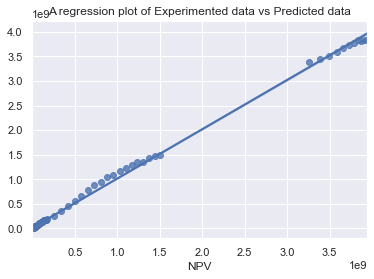

In [132]:
sns.regplot(ya_test,validation)
plt.title('A regression plot of Experimented data vs Predicted data')
plt.show()

In [135]:
#from pandas import DataFrame
#df= DataFrame({'pred':validation})
#df

from pandas import DataFrame
df= DataFrame({'Predicted values':validation, 'Experimental values':ya_test})
df

,Predicted values,Experimental values
0,3.485409e+03,2.450980e+03
1,5.548131e+03,4.853900e+03
2,8.792677e+03,7.209710e+03
3,1.181506e+04,9.519320e+03
4,1.376215e+04,1.178365e+04
...,...,...
158,1.715315e+08,1.493601e+08
159,1.750650e+08,1.544260e+08
160,1.788401e+08,1.591663e+08
161,1.792397e+08,1.636018e+08


In [134]:
df.to_csv('ExtraValresult.csv')